
# Gradient Descent
Given we can calculate the gradient of our cost function, we can minimize it by moving in the opposite direction of the gradient using some learning rate. We implement a `fit` function in `Sigmoid Classifier`. To this aim, we simply pass a `gradient()` function to an **optimizer** and ask it to find the optimal set of parameters for our model. In this way, we define an optimizer class and pass an instance of this class to the `fit` function for our model. The `fit` function could then `run` the optimizer to fit the data. 

In [1]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

# Gradient descent
We need to write the update rule

In [2]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        N = x.shape[0]
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            #We sample the sample t
            xn=x[t%N]
            yn=y[t%N]

            grad = gradient_fn(xn,yn, w)               # compute the gradient with present weight
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

Note that in the implementation above we added an option to record the history of model parameter's during gradient descent for the purpose of visualization.
Let's implement the `Sigmoid classifier` class to use an optimizer.

In [3]:
class SigmoidClassifier:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer,w0=None):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        def gradient(x, t, w):                          # define the gradient function
            yh =  x @ w 
            alpha=np.exp(-yh)/np.power(1.0+np.exp(-yh),2)
            grad = 2.0*(1/(1+np.exp(-yh)) - t)*alpha*x
            return grad

        if w0 is None:
            w0 = np.random.randn(D)                               # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(len(x))])
        #print(x)    
        yh = x@self.w
        return 1/(1+np.exp(-yh))

Now let's fit this model to some toy data. We consider 2 classese and 1D data.

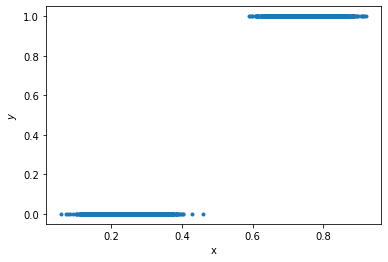

In [4]:
N = 5000
x1=0.25 + 0.05*np.random.randn(N) # class 0
y1=np.zeros(N)

x2=0.75 + 0.05*np.random.randn(N) # class 1
y2=np.ones(N)


x = np.concatenate([x1,x2])
y = np.concatenate([y1,y2])


# we shuffle the samples
p = np.random.permutation(2*N)
x=x[p]
y=y[p]


plt.plot(x, y, '.')
plt.xlabel('x')
plt.ylabel(r'$y$')

plt.show()







Let's train our modle and display the predcition of our model on our training data

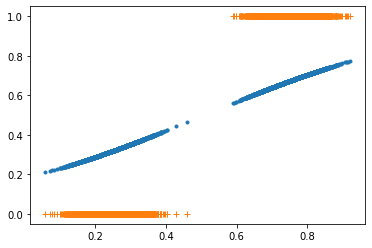

In [5]:
optimizer = GradientDescent(learning_rate=0.5, max_iters=150, record_history=True)
model = SigmoidClassifier()
model.fit(x,y, optimizer)



prediction=model.predict(x)
binary_prediction=prediction>0.5

plt.plot(x,prediction, '.')

plt.plot(x, binary_prediction, '+')
plt.show()


## Change of learning rate
Next, let's visualize the effect of learning rate on the behaviour of gradient descent in linear regression.
Again, we use the plot-contour function to visualize the optimization landscape. 

In [6]:
import itertools
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

Let's track the steps of the 
gradient descent using different values for the learning rate.

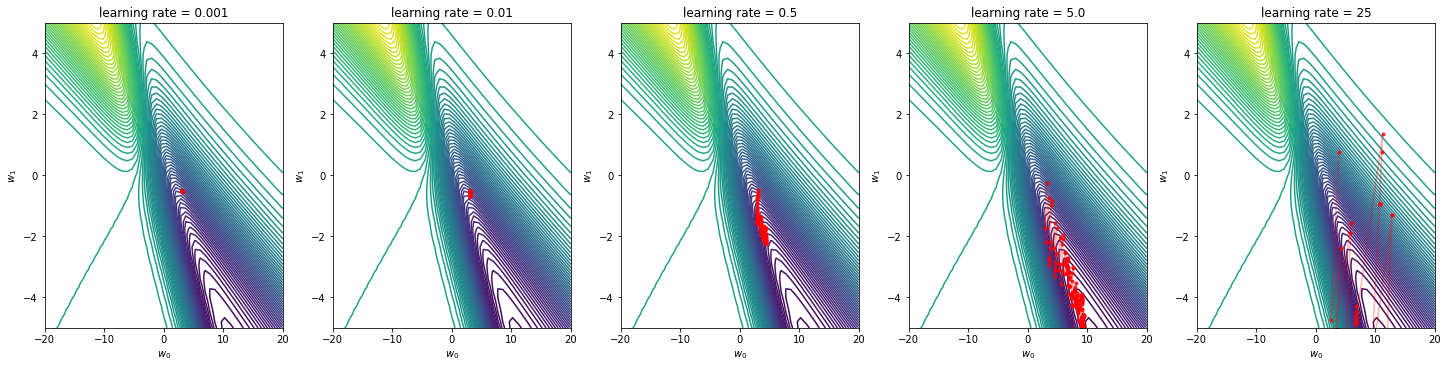

In [7]:
cost = lambda w: np.mean((1/(1+np.exp( -w[0]*x-w[1])) - y)**2)
learning_rates = [.001, .01, .5,5.0,25]
fig, axes = plt.subplots(ncols=len(learning_rates), nrows=1, constrained_layout=True, figsize=(20, 5))
w0=[3.0,-0.5]#np.random.randn(2)/10.0
for i, lr in enumerate(learning_rates):
    optimizer = GradientDescent(learning_rate=lr, max_iters=150, record_history=True)
    model = SigmoidClassifier()
    model.fit(x,y, optimizer,w0=w0)
    plot_contour(cost, [-20,20], [-5,5], 50, axes[i])
    w_hist = np.vstack(optimizer.w_history)                  # get the history for plotting
    axes[i].plot(w_hist[:,0], w_hist[:,1], '.r', alpha=.8)
    axes[i].plot(w_hist[:,0], w_hist[:,1], '-r', alpha=.3)
    axes[i].set_xlabel(r'$w_0$')
    axes[i].set_ylabel(r'$w_1$')
    axes[i].set_title(f'learning rate = {lr}')
    axes[i].set_xlim([-20,20])
    axes[i].set_ylim([-5,5])
plt.show()